<a href="https://colab.research.google.com/github/codemishka/Prediction-of-Product-Sales/blob/main/STARTER_Feature_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name: Mishka Janghbahadur


> This is a starter notebook for the Feature Inspection Exercise. Make sure to read the assignment instructions carefully before you start!



We will continue to work on your sales prediction project. **The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.**

 **The target is Item_Outlet_Sales**

For Part 4, your task is to inspect the features:  For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning in the next course. Therefore, before you proceed,  

*   **Remove the placeholders you added in week 2 and replace them with null values.**

This will allow our functions to report the presence and frequency of null values as part of our EDA.​

For each feature:

1.   **Add a new markdown header.**
2.   **Paste the feature's definition from the data dictionary into a markdown cell.**
3. **Create a univariate visualization showing the distribution of values/categories.**
You may use the EDA functions from the previous lessons or create your own visualizations.
4. **Answer the following questions from the Feature Inspection lesson in a markdown cell:**

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)
*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
*   Is the feature constant or quasi-constant?
*   What is the cardinality? Is it high (>10)?
*   Would we know this feature before the target is determined?
*   Is there a business case/understanding reason to exclude based on our business case?

**Create a multivariate visualization plotting each feature vs. the target.**
You may use the EDA functions from the previous lessons or create your own visualizations.​


**Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
Based on your business understanding, would you expect this feature to be a predictor of the target?
Does this feature appear to be a predictor of the target?






# Project 1 - Part 4 (Core):

## EDA Functions from Lessons

### Univariate EDA Functions

In [42]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


### Multivariate Feature vs. Target Functions.

In [43]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

# Your Work Here:

## Import Packages and Load Data

>Load Data

In [44]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> Import Packages

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno


In [46]:
fname='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean the Data

In [47]:
df.shape

(8523, 12)

The data has 8523 rows and 12 Columns

In [48]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

There are no unnamed columns.

All data types are as they should be.

> Duplicated Data

In [49]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()


0

Removed all duplicates

> Missing Values

A key difference in preparing our data for modeling is that we will NOT fill in any missing values.

The target is Item_Outlet_Sales. We would drop the rows with null values for Item_Outlet_Sales, since Item_Outlet_Sales is the target column we are trying to explain and predict. However, no null values are found for this column.

We next check the entire DataFrame for null values. Then we determined how many null values were present in each column.




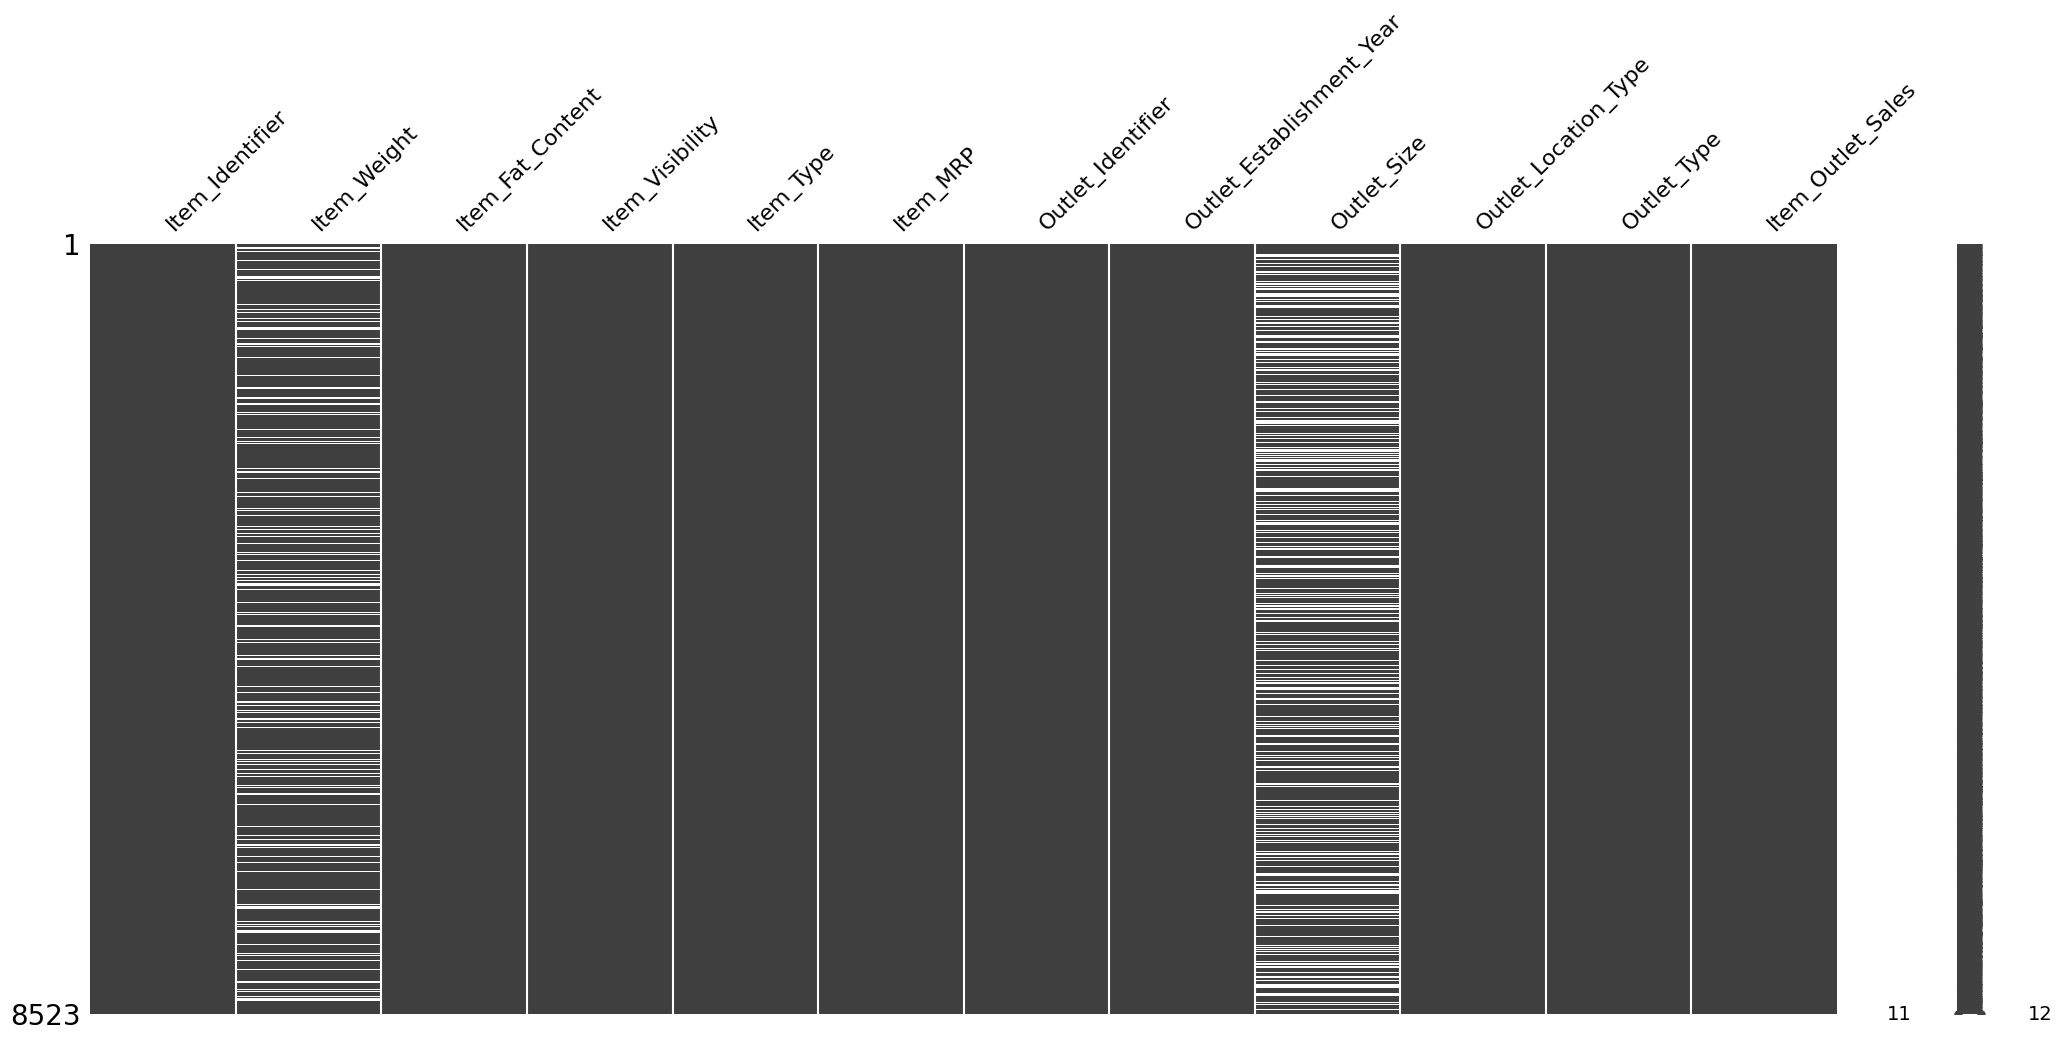

In [50]:
msno.matrix(df);

In [51]:
# Get the # of null values per column
null_sums = df.isna().sum()
null_sums[null_sums>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [52]:
# Calculate the % of null values
null_percent = null_sums/len(df) * 100
# Show only columns with missing values
null_percent[null_percent>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

However, we do not want to fill in null values at this point in our workflow for Machine Learning. Instead, we will move on to checking for inconsistent values.

> Inconsistent categories of data

Check the value counts for every "object" dtype and look for inconsistencies.

In [53]:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [54]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


We need to fix Outlet_Type. "Grocery Store" needs to be "Supermarket Type 4".

In [55]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [56]:
# Standardize the values in the Outlet_Type column
df['Outlet_Type'] = df['Outlet_Type'].replace({'Grocery Store':"Supermarket Type 4"})
df['Outlet_Type'].value_counts()

Supermarket Type1     5577
Supermarket Type 4    1083
Supermarket Type3      935
Supermarket Type2      928
Name: Outlet_Type, dtype: int64

Now everything looks good.

> Check numeric columns

In [57]:
# Getting the description for numeric features
description = df.describe().round(2)
description

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [58]:
# Limit output to min, max, 25% and 75%
description.loc[['min','25%','75%','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.56,0.00,31.29,1985.0,33.29
25%,8.77,0.03,93.83,1987.0,834.25
75%,16.85,0.09,185.64,2004.0,3101.30
max,21.35,0.33,266.89,2009.0,13086.96


Address *Item_Outlet_Sales*

The max value is much higher than the 75th percentile



In [59]:
# CHECK item outlet sales (Item_Outlet_Sales >= 10 000)
filter_high_price = df['Item_Outlet_Sales'] >= 10000
df[filter_high_price]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1009,FDU14,NaN,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750
1450,FDZ20,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,NaN,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
4888,FDF39,14.85,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
5223,FDQ19,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
6541,FDI50,NaN,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
7191,NCH18,NaN,Low Fat,0.044445,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.8882


In [60]:
# Checking 5 highest prices to compare  outlier values
df.sort_values("Item_Outlet_Sales", ascending=False).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,NaN,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,NaN,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840


It doesn't appear like the max value is an outlier.

# Save the dataframe


In [61]:
# Saving the final dataframe to Google Drive
fpath_out = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/sales_predictions_2023.csv"
df.to_csv(fpath_out, index=True)

In [62]:
# Testing saved file
loaded = pd.read_csv(fpath_out)
loaded

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Supermarket Type 4,732.3800
4,4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Inspect the data

In [63]:
column_name = 'Unnamed: 0'
if column_name in df.columns:
    df = df.drop(columns=[column_name])

**Ordinal Features**

are categories that represent different classes and that have a distinct ordering.

*   Item_Fat_Content
*   Outlet_Size
*   Outlet_Location_Type


**Categorical Features (nominal)**

are categories that represent different classes. They are not ordered.



*   Item_Identifier
*   Item_Type
*   Outlet_Identifier
*   Outlet_Type




### Make a Temporary Copy of the Dataframe for EDA

In [64]:
# Copy of dataframe just for visualization and EDA
temp_df = df.copy()

> Fill in missing values with a placeholder

In [65]:
x = 'Item_Weight'
placeholder = 'MISSING'
# In our temporatory df, we will fill in the missing values in the Item_Weight column with the placeholder, MISSING
temp_df[x] = temp_df[x].fillna(placeholder)

In [66]:

x = 'Outlet_Size'
placeholder = 'MISSING'
# In our temporatory df, we will fill in the missing values in the Outlet_Size column with the placeholder, MISSING
temp_df[x] = temp_df[x].fillna(placeholder)

## Answer the following questions:

- Define your target column:
  - Item_Outlet_Sales
- Is this a classification or regression task?
  - ...

## Inspecting Each Feature

>Tip: You will need to make a copy of the example cells below for every feature in the dataset.
- To make this easier you can copy and paste the template cells:
  - First, click on the example feature header cell below
    - Hold down the shift key while you scrol down to the last cell
    - While holding the shift key, left-click on the final cell at the bottom.
      - It should highlight all 7 cells at once.
  - Then Right-click and select "Copy Cells" to copy them.
  - To paste them, you must use the keyboard shortcut (Control + V on windows, Cmd + V) on Mac.


# Numeric Features

**Numeric Features**

 are integers or floats that represent a quantity. They can also be referred to as quantitative features.

*   Item_Weight
*   Item_Visibility
*   Item_MRP
*   Outlet_Establishment_Year
*   Item_Outlet_Sales



### Example: {Item_Weight}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [72]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

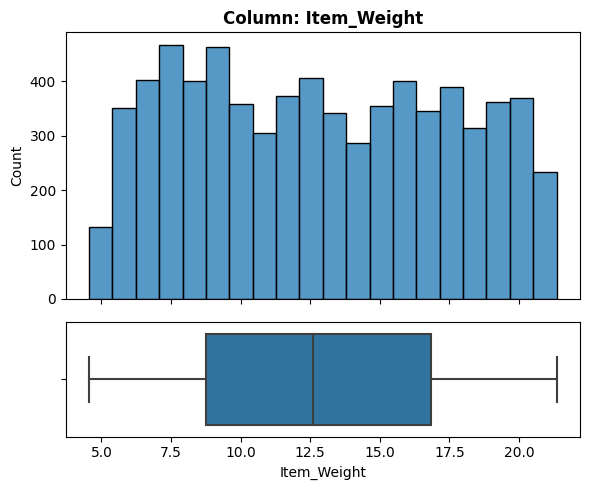

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [73]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



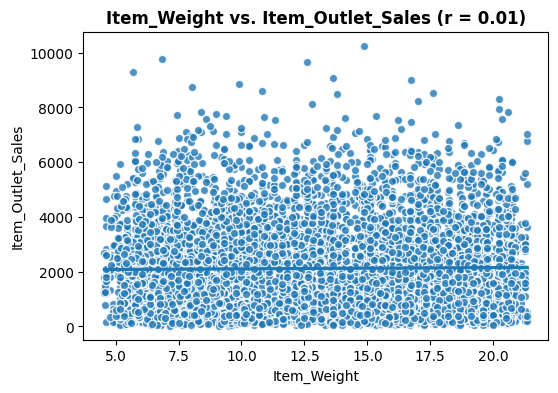

In [74]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

### Example: {Item_Visibility}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [75]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

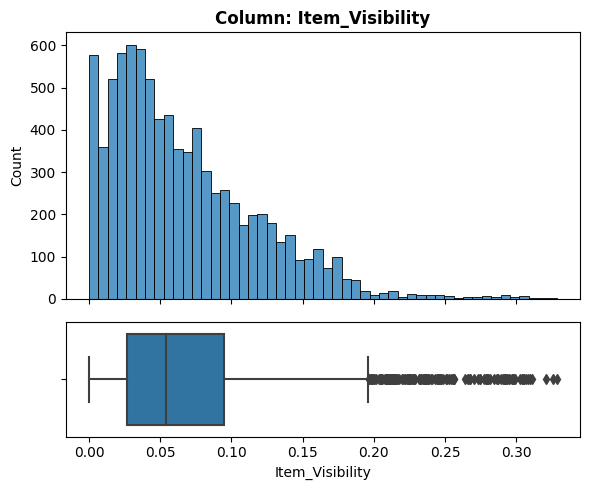

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [76]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



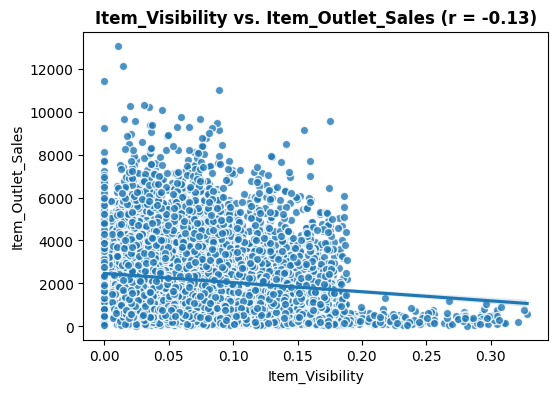

In [77]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

### Example: {Item_MRP}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [79]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

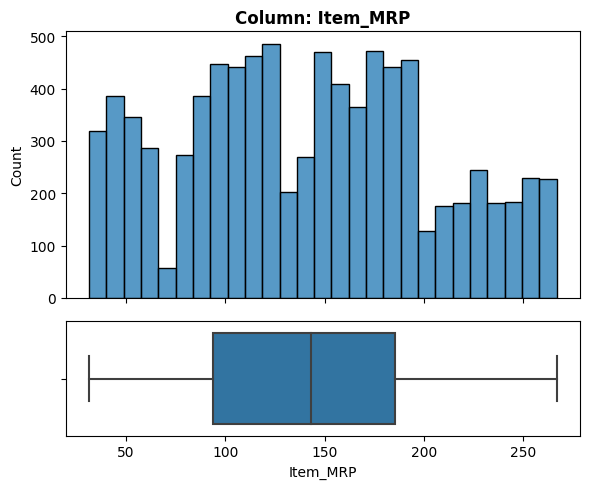

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [80]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



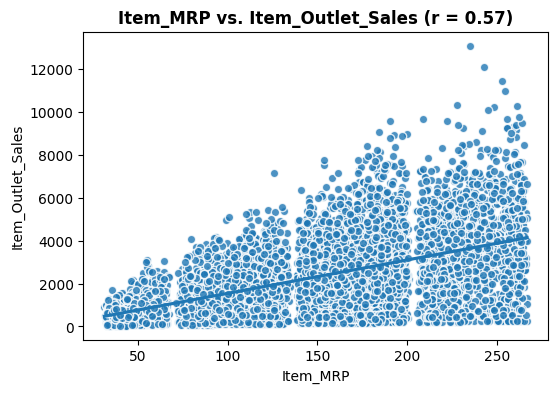

In [81]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

### Example: {Outlet_Establishment_Year}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [82]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

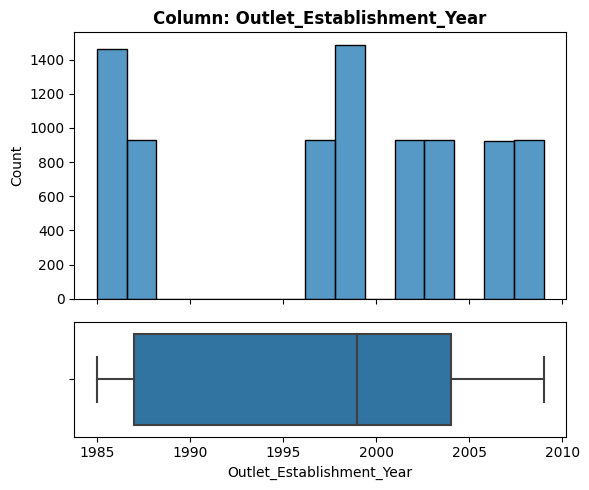

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [83]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



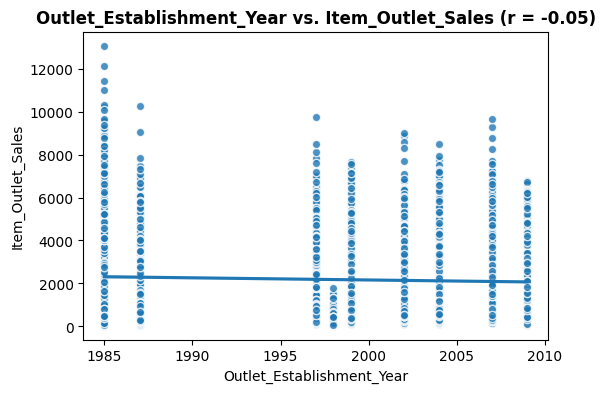

In [84]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

### Example: {Item_Outlet_Sales}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [85]:
# Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype

dtype('float64')

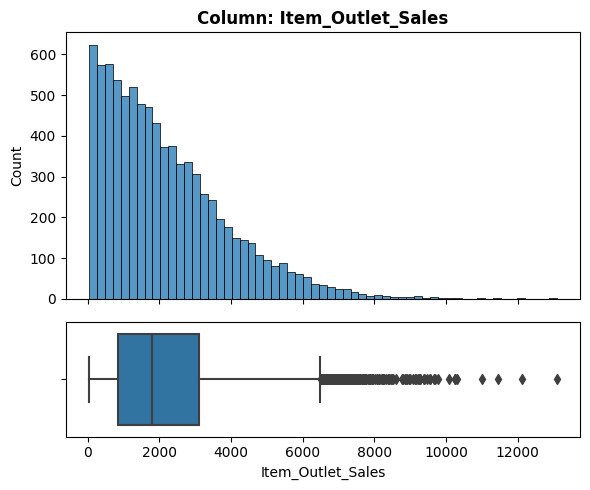

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [86]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



In [ ]:
# Run the appropriate feature vs. target function (based on dtype)


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

## Inspecting Each Feature

>Tip: You will need to make a copy of the example cells below for every feature in the dataset.
- To make this easier you can copy and paste the template cells:
  - First, click on the example feature header cell below
    - Hold down the shift key while you scrol down to the last cell
    - While holding the shift key, left-click on the final cell at the bottom.
      - It should highlight all 7 cells at once.
  - Then Right-click and select "Copy Cells" to copy them.
  - To paste them, you must use the keyboard shortcut (Control + V on windows, Cmd + V) on Mac.


### Example: {Feature Name}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



In [ ]:
# Run the appropriate feature vs. target function (based on dtype)


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

## Inspecting Each Feature

>Tip: You will need to make a copy of the example cells below for every feature in the dataset.
- To make this easier you can copy and paste the template cells:
  - First, click on the example feature header cell below
    - Hold down the shift key while you scrol down to the last cell
    - While holding the shift key, left-click on the final cell at the bottom.
      - It should highlight all 7 cells at once.
  - Then Right-click and select "Copy Cells" to copy them.
  - To paste them, you must use the keyboard shortcut (Control + V on windows, Cmd + V) on Mac.


### Example: {Feature Name}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



In [ ]:
# Run the appropriate feature vs. target function (based on dtype)


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

## Inspecting Each Feature

>Tip: You will need to make a copy of the example cells below for every feature in the dataset.
- To make this easier you can copy and paste the template cells:
  - First, click on the example feature header cell below
    - Hold down the shift key while you scrol down to the last cell
    - While holding the shift key, left-click on the final cell at the bottom.
      - It should highlight all 7 cells at once.
  - Then Right-click and select "Copy Cells" to copy them.
  - To paste them, you must use the keyboard shortcut (Control + V on windows, Cmd + V) on Mac.


### Example: {Feature Name}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



In [ ]:
# Run the appropriate feature vs. target function (based on dtype)


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

## Inspecting Each Feature

>Tip: You will need to make a copy of the example cells below for every feature in the dataset.
- To make this easier you can copy and paste the template cells:
  - First, click on the example feature header cell below
    - Hold down the shift key while you scrol down to the last cell
    - While holding the shift key, left-click on the final cell at the bottom.
      - It should highlight all 7 cells at once.
  - Then Right-click and select "Copy Cells" to copy them.
  - To paste them, you must use the keyboard shortcut (Control + V on windows, Cmd + V) on Mac.


### Example: {Feature Name}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



In [ ]:
# Run the appropriate feature vs. target function (based on dtype)


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

## Inspecting Each Feature

>Tip: You will need to make a copy of the example cells below for every feature in the dataset.
- To make this easier you can copy and paste the template cells:
  - First, click on the example feature header cell below
    - Hold down the shift key while you scrol down to the last cell
    - While holding the shift key, left-click on the final cell at the bottom.
      - It should highlight all 7 cells at once.
  - Then Right-click and select "Copy Cells" to copy them.
  - To paste them, you must use the keyboard shortcut (Control + V on windows, Cmd + V) on Mac.


### Example: {Feature Name}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



In [ ]:
# Run the appropriate feature vs. target function (based on dtype)


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

## Inspecting Each Feature

>Tip: You will need to make a copy of the example cells below for every feature in the dataset.
- To make this easier you can copy and paste the template cells:
  - First, click on the example feature header cell below
    - Hold down the shift key while you scrol down to the last cell
    - While holding the shift key, left-click on the final cell at the bottom.
      - It should highlight all 7 cells at once.
  - Then Right-click and select "Copy Cells" to copy them.
  - To paste them, you must use the keyboard shortcut (Control + V on windows, Cmd + V) on Mac.


### Example: {Feature Name}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



In [ ]:
# Run the appropriate feature vs. target function (based on dtype)


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___

## Inspecting Each Feature

>Tip: You will need to make a copy of the example cells below for every feature in the dataset.
- To make this easier you can copy and paste the template cells:
  - First, click on the example feature header cell below
    - Hold down the shift key while you scrol down to the last cell
    - While holding the shift key, left-click on the final cell at the bottom.
      - It should highlight all 7 cells at once.
  - Then Right-click and select "Copy Cells" to copy them.
  - To paste them, you must use the keyboard shortcut (Control + V on windows, Cmd + V) on Mac.


### Example: {Feature Name}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [ ]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype

In [ ]:
# run the appropriate explore function (based on feature's dtype)


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ...

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ...

3. Is the feature constant or quasi-constant?
  - ...

4. What is the cardinality? Is it high?
  - ...

5. Would we know this BEFORE the target is determined?
  - ...

6. Is there a business case/understanding reason to exclude based on our business case?
  - ...



In [ ]:
# Run the appropriate feature vs. target function (based on dtype)


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?

___